### Title - Import and Export of India Analysis (1997-2022)

### Group number - 06 
Vansh Maheshwari - 22b3304 </br>
Kashish Talwar - 22b3308 </br>
Devendra Verma - 22b2124 </br>
Mayukh Abhigyan Das - 22b0033 </br>
Kshitij Kumar Pradhan - 22b4215 </br>
Abhishek Kumar Singh - 22B0004 </br>


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import linregress,ttest_ind 
import numpy as np

# Data Cleaning and Loading

In [2]:
                                                                                                                                                                                                                                                                                                                                                                                                                    data=pd.read_csv('exports and imports of india(1997- July 2022) - exports and imports.csv')
data

,Country,Export,Import,Total Trade,Trade Balance,Financial Year(start),Financial Year(end)
0,AFGHANISTAN,21.25,10.7,31.95,10.55,1997,1998
1,AFGHANISTAN,12.81,28.14,40.95,-15.33,1998,1999
2,AFGHANISTAN,33.2,21.06,54.26,12.15,1999,2000
3,AFGHANISTAN,25.86,26.59,52.45,-0.73,2000,2001
4,AFGHANISTAN,24.37,17.52,41.89,6.85,2001,2002
...,...,...,...,...,...,...,...
5989,ZIMBABWE,181.72,7.79,189.51,173.93,2018,2019
5990,ZIMBABWE,161.13,13.59,174.72,147.54,2019,2020
5991,ZIMBABWE,175.72,5.71,181.42,170.01,2020,2021
5992,ZIMBABWE,200.49,7.77,208.27,192.72,2021,2022


In [3]:
data.describe()


,Financial Year(start)
count,5994.000000
mean,2009.596096
std,7.460527
min,1997.000000
25%,2003.000000
50%,2010.000000
75%,2016.000000
max,2022.000000


In [4]:
print(data.isnull().sum())  # This will print the number of missing values in each column


Country                    0
Export                     8
Import                   552
Total Trade              585
Trade Balance            586
Financial Year(start)      0
Financial Year(end)        0
dtype: int64


<Axes: >

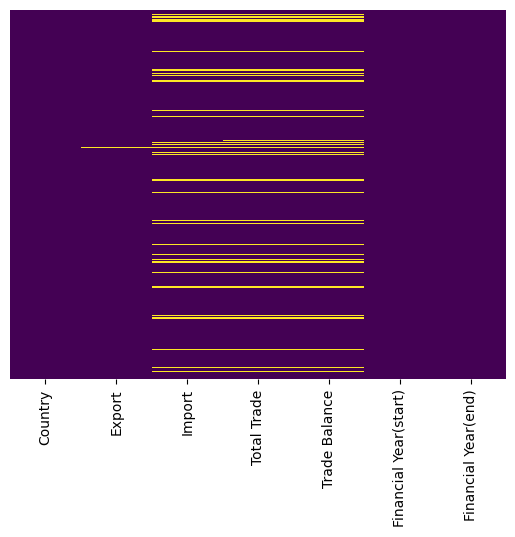

In [5]:
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='viridis')# to shjow the presemce of null values i.e orange horizontal line above
# every column name indicates presence of a NA value in corresponding column


In [6]:
data.info()
data.nunique()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5994 entries, 0 to 5993
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Country                5994 non-null   object
 1   Export                 5986 non-null   object
 2   Import                 5442 non-null   object
 3   Total Trade            5409 non-null   object
 4   Trade Balance          5408 non-null   object
 5   Financial Year(start)  5994 non-null   int64 
 6   Financial Year(end)    5994 non-null   object
dtypes: int64(1), object(6)
memory usage: 327.9+ KB


Country                   250
Export                   4455
Import                   3728
Total Trade              4603
Trade Balance            4499
Financial Year(start)      26
Financial Year(end)        26
dtype: int64

In [7]:
data['Export'] = data['Export'].replace(',', '', regex=True)
data['Import'] = data['Import'].replace(',', '', regex=True)
data['Export'] = pd.to_numeric(data['Export'], errors='coerce')
data['Import'] = pd.to_numeric(data['Import'], errors='coerce')
data['Export'] = data['Export'].fillna(0)
data['Import'] = data['Import'].fillna(0)

In [8]:
print(data.isnull().sum())

Country                    0
Export                     0
Import                     0
Total Trade              585
Trade Balance            586
Financial Year(start)      0
Financial Year(end)        0
dtype: int64


In [9]:
data['Total Trade'] = data['Export'] + data['Import']
data['Trade Balance'] = data['Export'] - data['Import']

In [10]:
print(data.isnull().sum())

Country                  0
Export                   0
Import                   0
Total Trade              0
Trade Balance            0
Financial Year(start)    0
Financial Year(end)      0
dtype: int64


In [11]:
data.head()

,Country,Export,Import,Total Trade,Trade Balance,Financial Year(start),Financial Year(end)
0,AFGHANISTAN,21.25,10.70,31.95,10.55,1997,1998
1,AFGHANISTAN,12.81,28.14,40.95,-15.33,1998,1999
2,AFGHANISTAN,33.20,21.06,54.26,12.14,1999,2000
3,AFGHANISTAN,25.86,26.59,52.45,-0.73,2000,2001
4,AFGHANISTAN,24.37,17.52,41.89,6.85,2001,2002


# Data Visualisation

## Total Import and Export Analysis

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25],
 [Text(0, 0, '1997'),
  Text(1, 0, '1998'),
  Text(2, 0, '1999'),
  Text(3, 0, '2000'),
  Text(4, 0, '2001'),
  Text(5, 0, '2002'),
  Text(6, 0, '2003'),
  Text(7, 0, '2004'),
  Text(8, 0, '2005'),
  Text(9, 0, '2006'),
  Text(10, 0, '2007'),
  Text(11, 0, '2008'),
  Text(12, 0, '2009'),
  Text(13, 0, '2010'),
  Text(14, 0, '2011'),
  Text(15, 0, '2012'),
  Text(16, 0, '2013'),
  Text(17, 0, '2014'),
  Text(18, 0, '2015'),
  Text(19, 0, '2016'),
  Text(20, 0, '2017'),
  Text(21, 0, '2018'),
  Text(22, 0, '2019'),
  Text(23, 0, '2020'),
  Text(24, 0, '2021'),
  Text(25, 0, '2022')])

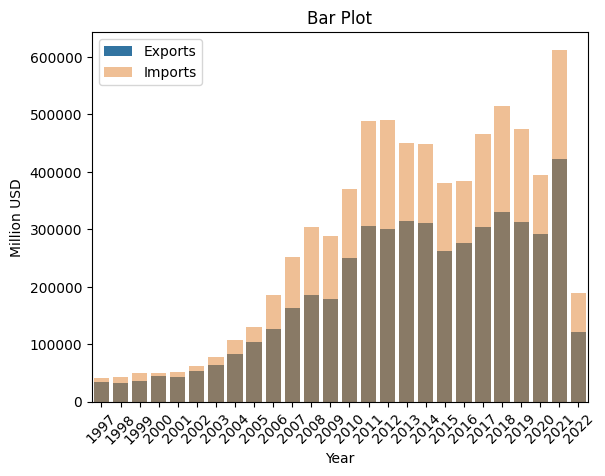

In [12]:
exports = data.groupby('Financial Year(start)')['Export'].sum()
imports = data.groupby('Financial Year(start)')['Import'].sum()
Total = pd.DataFrame({
    'TotalExports':exports,
    'TotalImports':imports
})
Total.reset_index(inplace=True)
sns.barplot(x='Financial Year(start)', y='TotalExports', data=Total, label='Exports')
sns.barplot(x='Financial Year(start)', y='TotalImports', data=Total, alpha=0.5, label='Imports')
plt.title('Bar Plot')
plt.ylabel('Million USD')
plt.xlabel('Year')
plt.legend()
plt.xticks(rotation=45)

Text(0, 0.5, 'Imports in Million USD')

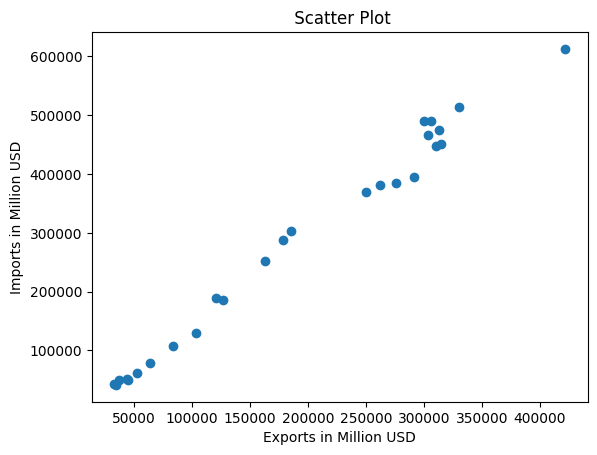

In [13]:
plt.scatter(Total['TotalExports'], Total['TotalImports'])
plt.title(' Scatter Plot')
plt.xlabel('Exports in Million USD')
plt.ylabel('Imports in Million USD')

Line plot (yearwise imports and exports)

(array([1995., 2000., 2005., 2010., 2015., 2020., 2025.]),
 [Text(1995.0, 0, '1995'),
  Text(2000.0, 0, '2000'),
  Text(2005.0, 0, '2005'),
  Text(2010.0, 0, '2010'),
  Text(2015.0, 0, '2015'),
  Text(2020.0, 0, '2020'),
  Text(2025.0, 0, '2025')])

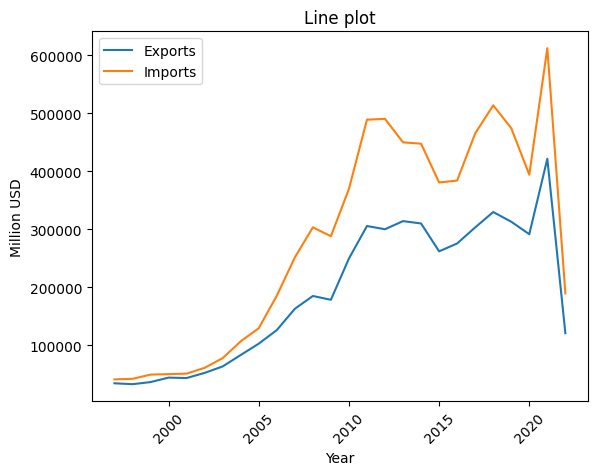

In [14]:
plt.plot(Total['Financial Year(start)'], Total['TotalExports'], label='Exports')
plt.plot(Total['Financial Year(start)'], Total['TotalImports'], label='Imports')
plt.title('Line plot')
plt.xlabel('Year')
plt.ylabel('Million USD')
plt.legend()
plt.xticks(rotation=45)


(array([1995., 2000., 2005., 2010., 2015., 2020., 2025.]),
 [Text(1995.0, 0, '1995'),
  Text(2000.0, 0, '2000'),
  Text(2005.0, 0, '2005'),
  Text(2010.0, 0, '2010'),
  Text(2015.0, 0, '2015'),
  Text(2020.0, 0, '2020'),
  Text(2025.0, 0, '2025')])

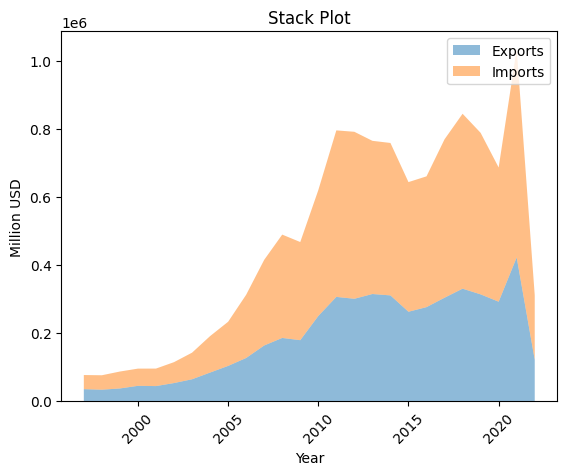

In [15]:
plt.stackplot(Total['Financial Year(start)'], Total['TotalExports'], Total['TotalImports'], labels=['Exports', 'Imports'], alpha=0.5)
plt.title('Stack Plot')
plt.xlabel('Year')
plt.ylabel('Million USD')
plt.legend()
plt.xticks(rotation=45)

## Countrywise Import and export data

Text(0, 0.5, 'Country')

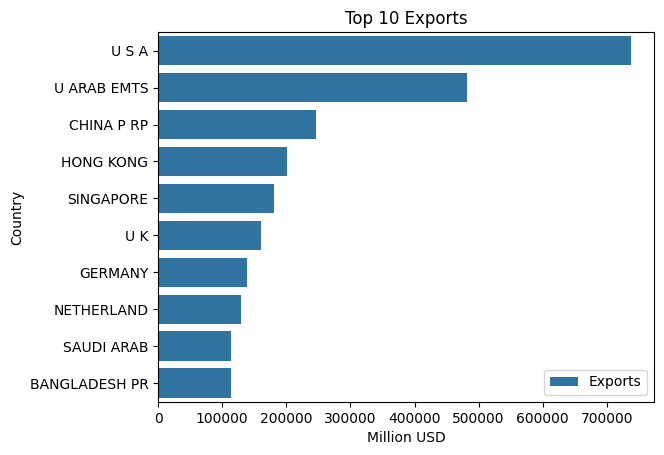

In [16]:
CountryTotal = data.groupby('Country')[['Export', 'Import']].sum().sort_values(by='Export', ascending=False) #groups the data by country, sums up the import and export.
#sort the result by exports 
CountryTotal.reset_index(inplace=True)
sns.barplot(x='Export', y='Country', data=CountryTotal.head(10),label='Exports')
plt.title('Top 10 Exports')
plt.xlabel('Million USD')
plt.ylabel('Country')

Text(0, 0.5, 'Country')

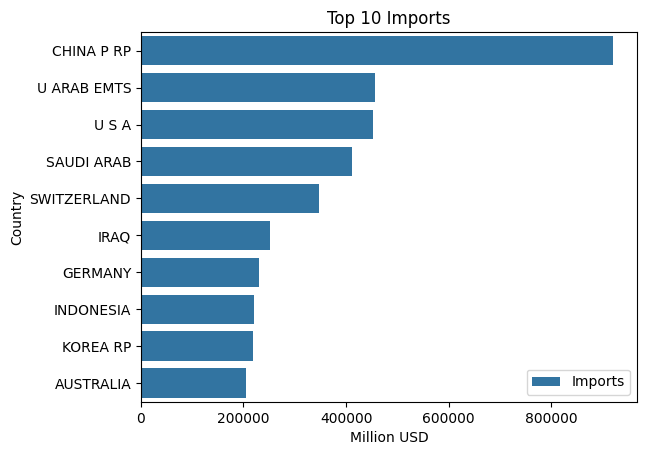

In [17]:
sns.barplot(x='Import', y='Country', data=CountryTotal.sort_values(by='Import', ascending=False).head(10), label='Imports')
plt.title('Top 10 Imports')
plt.xlabel('Million USD')
plt.ylabel('Country')

Correlation in Import,Export and Total trade 

Text(0.5, 1.0, 'Correlation Plot')

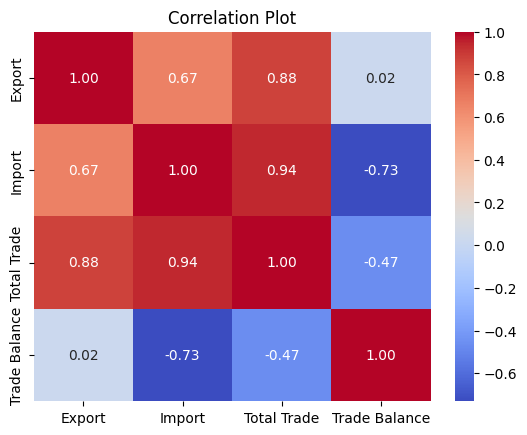

In [18]:
correlation = data[['Export', 'Import', 'Total Trade', 'Trade Balance']].corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Plot')

Pairplots

Text(0.5, 0.98, 'Pair Plot')

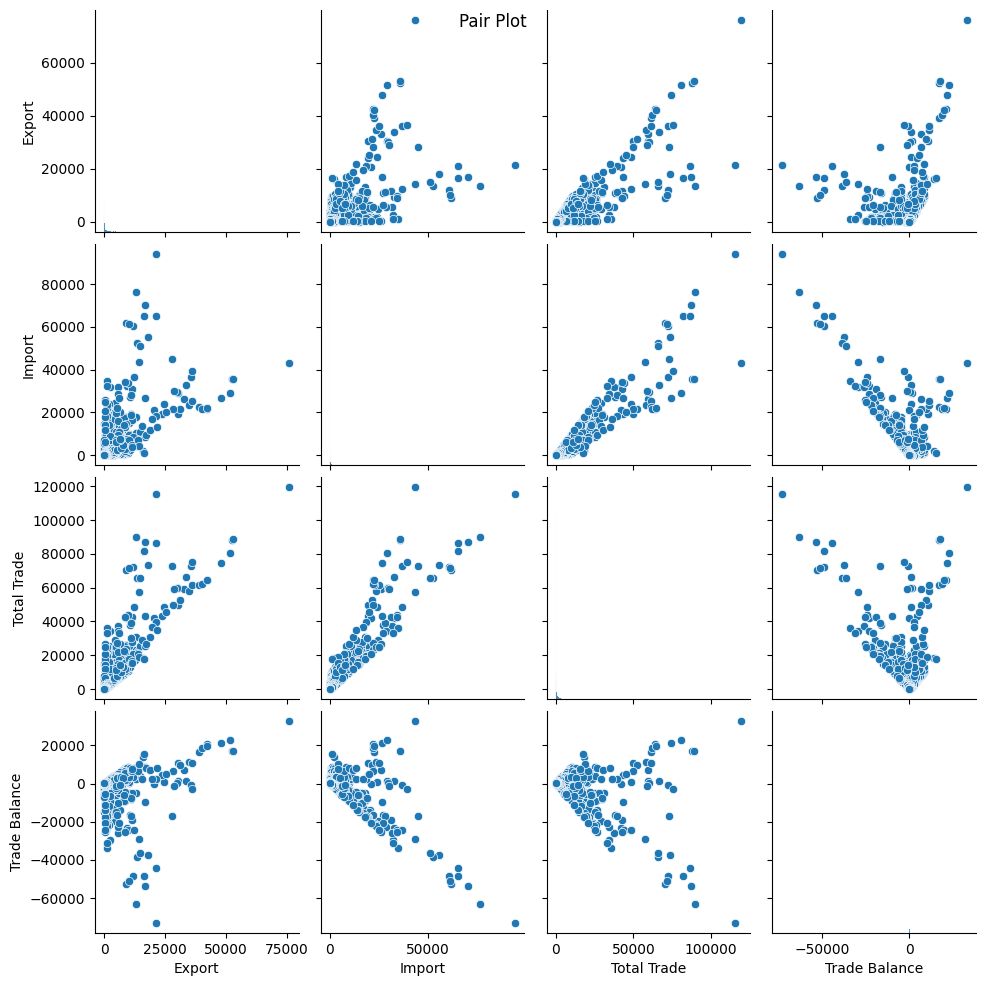

In [19]:
sns.pairplot(data[['Export', 'Import', 'Total Trade', 'Trade Balance']])
plt.suptitle('Pair Plot')  

# Linear Regression

### For export

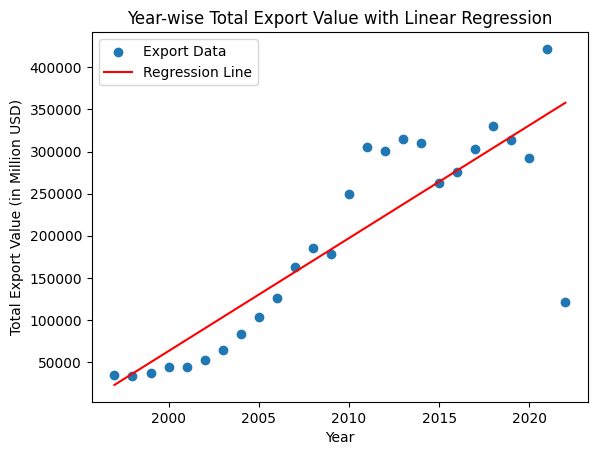

In [20]:
y_export=data.groupby('Financial Year(start)')['Export'].sum()
x_export=y_export.index
plt.scatter(x_export, y_export, label='Export Data')
slope, intercept, r_value, p_value, std_err = linregress(x_export, y_export)
plt.plot(x_export, intercept + slope * x_export, color='red', label='Regression Line')
plt.xlabel('Year')
plt.ylabel('Total Export Value (in Million USD)')
plt.title('Year-wise Total Export Value with Linear Regression')
plt.legend()
plt.show()

### For Import

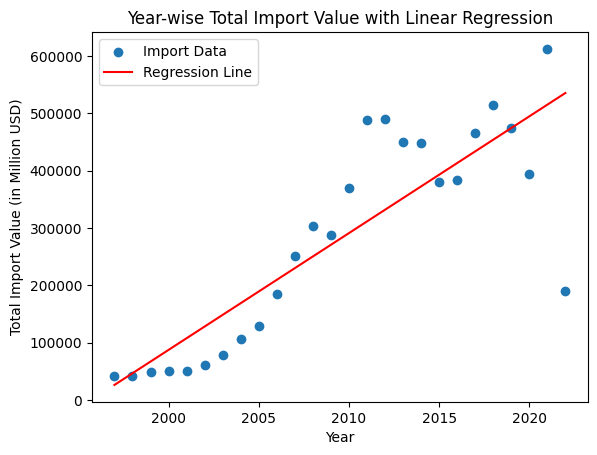

In [21]:
y_import=data.groupby('Financial Year(start)')['Import'].sum()
x_import=y_import.index
plt.scatter(x_import, y_import, label='Import Data')
slope, intercept, r_value, p_value, std_err = linregress(x_import, y_import)
plt.plot(x_import, intercept + slope * x_import, color='red', label='Regression Line')
plt.xlabel('Year')
plt.ylabel('Total Import Value (in Million USD)')
plt.title('Year-wise Total Import Value with Linear Regression')
plt.legend()
plt.show()

# Polynomial Regression

### For Export

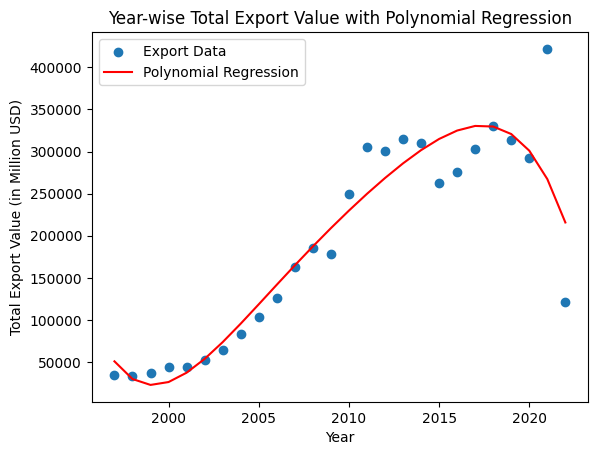

In [22]:
degree = 5
coefficients = np.polyfit(x_export, y_export, degree)
polynomial = np.poly1d(coefficients)
plt.scatter(x_export, y_export, label='Export Data')
plt.plot(x_export, polynomial(x_export), color='red', label='Polynomial Regression')
plt.xlabel('Year')
plt.ylabel('Total Export Value (in Million USD)')
plt.title('Year-wise Total Export Value with Polynomial Regression')
plt.legend()
plt.show()

### For Import

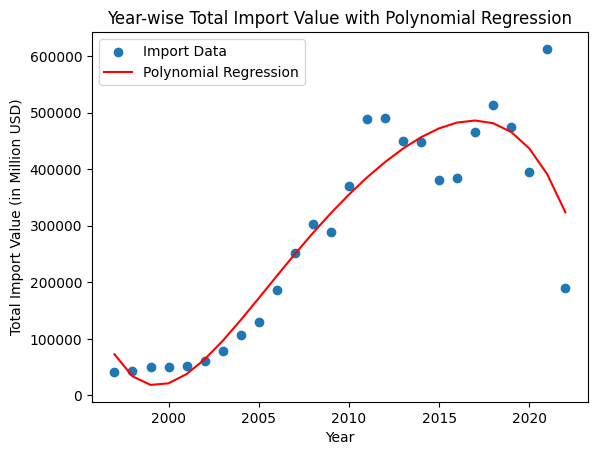

In [23]:
degree = 5
coefficients = np.polyfit(x_import, y_import, degree)
polynomial = np.poly1d(coefficients)
plt.scatter(x_import, y_import, label='Import Data')
plt.plot(x_import, polynomial(x_import), color='red', label='Polynomial Regression')
plt.xlabel('Year')
plt.ylabel('Total Import Value (in Million USD)')
plt.title('Year-wise Total Import Value with Polynomial Regression')
plt.legend()
plt.show()

# Hypothesis Testing

In [25]:
export_before_2014 = data[data['Financial Year(start)'] < 2014]['Export']
export_after_2014 = data[data['Financial Year(start)'] >= 2014]['Export']
np.random.seed(10)
export_sample_before_2014 = export_before_2014.sample(n=1000,replace=True)
export_sample_after_2014 = export_before_2014.sample(n=1000,replace=True)
t_statistic, p_value = ttest_ind(export_sample_before_2014, export_sample_after_2014, alternative = 'less',equal_var=False)
alpha = 0.05
print("T-statistic:", t_statistic)
print("p-value:", p_value)

if p_value < alpha:
    print("Reject null hypothesis: There is significant evidence that mean export is increased after year 2014.")
else:
    print("Fail to reject null hypothesis: There is no significant evidence that mean export is increased after year 2014.")

T-statistic: 0.2501230370962314
p-value: 0.598741041904138
Fail to reject null hypothesis: There is no significant evidence that mean export is increased after year 2014.


In [26]:
import_before_2014 = data[data['Financial Year(start)'] < 2014]['Import']
import_after_2014 = data[data['Financial Year(start)'] >= 2014]['Import']
np.random.seed(10)
import_sample_before_2014 = import_before_2014.sample(n=1000,replace=True)
import_sample_after_2014 = import_before_2014.sample(n=1000,replace=True)
t_statistic, p_value = ttest_ind(import_sample_before_2014, import_sample_after_2014, alternative = 'less',equal_var=False)
alpha = 0.05
print("T-statistic:", t_statistic)
print("p-value:", p_value)

if p_value < alpha:
    print("Reject null hypothesis: There is significant evidence that mean import is increased after year 2014.")
else:
    print("Fail to reject null hypothesis: There is no significant evidence that mean import is increased after year 2014.")

T-statistic: -1.01993129198345
p-value: 0.1539443383245947
Fail to reject null hypothesis: There is no significant evidence that mean import is increased after year 2014.
